In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from get_pong_data import get_objects_locations

In [5]:
train_data = np.load(file="train_data/training_data-1.npy", encoding='bytes')

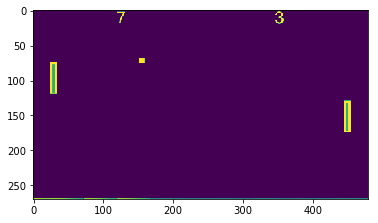

In [6]:
plt.imshow(train_data[0][0])

In [8]:
train_features_x = list()
train_features_y = list()

#Skip first train data to compute its position
first_data_features = get_objects_locations(train_data[0][0])
last_pos_h = first_data_features[0]
last_pos_v = first_data_features[1]

train_files = [
    "train_data/training_data-1.npy",
    "train_data/training_data-2.npy",
    "train_data/training_data-3.npy",
    "train_data/training_data-4.npy"
] 

for train_file in train_files:

    train_data = np.load(file=train_file, encoding='bytes')
    
    for td_x, td_y in train_data[1:]:
        #Get image features (objects positions)
        td_x_features = get_objects_locations(td_x)
        #Calculate current speed (delta space) and insert it
        h_speed = td_x_features[0] - last_pos_h
        v_speed = td_x_features[1] - last_pos_v

        last_pos_h = td_x_features[0]
        last_pos_v = td_x_features[1]

        td_x_features = np.insert(td_x_features, 2, [h_speed, v_speed])
        
        train_features_x.append(td_x_features)
        train_features_y.append(td_y)

        #train_features.append((td_x_features, td_y))
    
    
    
    #print(td_x_features,td_y, end="\n\n")
    #break
    
#print(train_features_x)
#print(train_features_y)

#get_objects_locations(train_data[0][0])

In [11]:
traindata_x_np = np.array(train_features_x)
traindata_y_np = np.array(train_features_y)

In [8]:
#train_features_np = np.array(train_features)

In [10]:
#train_features_np.shape

(3996, 2)

In [13]:
np.save("train_data_inputs", traindata_x_np)
np.save("train_data_labels", traindata_y_np)

In [13]:
train_features_np[0]

array([array([ 145.5,   80.5,   -9.5,    9. ,   28.5,   94.5,  449.5,  151.5]),
       list([1, 0, 0])], dtype=object)